___
**GROUP 2**
- Name 1: Taylor Bonar
- Name 2: Robert Burigo
- Name 3: Rashmi Patel
- Name 4: Scott Englerth
___
# Project Details
You are to build upon the predictive analysis (classification) that you already completed in the
previous mini-project, adding additional modeling from new classification algorithms as well as
more explanations that are inline with the CRISP-DM framework. You should use appropriate cross
validation for all of your analysis (explain your chosen method of performance validation in detail).
Try to use as much testing data as possible in a realistic manner (you should define what you think
is realistic and why).

## Dataset Selection
You must identify two tasks from the dataset to regress or classify. That is:
* two classification tasks OR
* two regression tasks OR
* one classification task and one regression task

For our tasks, we will look into one classification task and one regression task:
* Classifying multiclass genre classifications based on audio features
* Regression on predicting a song's popularity based on audio features

## Data Preparation
Define and prepare your class variables. Use proper variable
representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for
dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for
the analysis
### Data Importing

In [155]:
import os
import pandas as pd  # working w/ data frames

# Classification Techniques
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score

In [156]:
file_path = os.path.join(os.getcwd(), "SpotifyFeatures.csv")

#Loading in csv Spotify dataset
df = pd.read_csv(file_path)  # read in the csv file

# Data Import Check
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data Inspection
#### Duplicates

In [157]:
print(df[df.duplicated(keep=False)])

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []


After our initial import of the dataset, there appears to be no duplicated rows when checking all the columns, but let's
take a second look at our dataset for specifically track_id, the Spotify identifier for a specific song.

In [172]:
duplicated_all = df[df.duplicated(subset = 'track_id', keep=False)]
duplicated = df[df.duplicated(subset = 'track_id', keep='first')]
df[df['track_id'] == duplicated['track_id'].iloc[1]] # Because I wanted to show Frank Ocean

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
142,R&B,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
68573,Hip-Hop,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
77577,Children’s Music,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37
192149,Soul,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,66,0.975,0.377,334570,0.255,0.000208,E,0.102,-11.165,Minor,0.0387,125.004,5/4,0.37


With this we can see that the Spotify API has a limitation for handling multi-genre songs. We'll need to identify
how many of our songs are duplicated but marked with different genres to see how this may affect our model later.

In [179]:
og_duplicates_shape = duplicated.shape[0]
og_total_dupes = duplicated_all.shape[0]
og_total_df_records = df.shape[0]
og_dupe_percentage = round(duplicated_all.shape[0]/df.shape[0]*100, 2)

print(f'''Original Dataset's Unique Duplicates: {og_duplicates_shape}
Original Dataset's Total Duplicates: {og_total_dupes}
Original Dataset's Total Data: {og_total_df_records}
Original Dataset's Duplicates %: {og_dupe_percentage}''')

Original Dataset's Unique Duplicates: 275
Original Dataset's Total Duplicates: 550
Original Dataset's Total Data: 232725
Original Dataset's Duplicates %: 0.24


We have a large portion of our dataset that are duplicate songs but marked as different genres. As we do not have a
secondary source to supplement and reduce this dimensionality, we'll have to proceed with caution and note this as
a potential performance reducer.

However, for our regression task, we can simply drop the genre feature as it is not part of the audio features we plan
on using for our model and its task of predicting a track's popularity. Then we can keep all unique rows to simplify the
regression dataset.

In [181]:
df_audio_reg_feats = df.drop(columns=["genre"]).reset_index(drop=True)
df_audio_reg_feats.drop_duplicates(subset=['artist_name','track_name','track_id'], keep='first',inplace=True)

duplicated_all = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep=False)]
duplicated = df_audio_reg_feats[df_audio_reg_feats.duplicated(subset = 'track_id', keep='first')]
df_audio_reg_feats[df_audio_reg_feats['track_id'] == duplicated['track_id'].iloc[0]]

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
276,Tobi Lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,62,0.19,0.736,215385,0.643,0.0,F,0.106,-8.636,Major,0.0461,156.002,4/4,0.599
1634,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19,0.736,215385,0.643,0.0,F,0.106,-8.636,Major,0.0461,156.002,4/4,0.599


In [180]:
duplicates_shape = duplicated.shape[0]
total_dupes = duplicated_all.shape[0]
total_df_records = df_audio_reg_feats.shape[0]
dupe_percentage = round(duplicated_all.shape[0]/df_audio_reg_feats.shape[0]*100, 2)

print(f'''Regression Dataset's Unique Duplicates: {duplicates_shape}
Regression Dataset's Total Duplicates: {total_dupes}
Regression Dataset's Total Data: {total_df_records}
Regression Dataset's Duplicates %: {dupe_percentage}''')

Regression Dataset's Unique Duplicates: 275
Regression Dataset's Total Duplicates: 550
Regression Dataset's Total Data: 177049
Regression Dataset's Duplicates %: 0.31


For the regression dataset, we can now see that after dropping genre, and then dropping duplicates based off the track_id,
track_name, and artist_name, we've reduced our duplication and records size considerably. There is however, still a small
percentage of duplicate records with the only difference being popularity. This may be a shortsight on how the data was
collected from Spotify and could be due to the repeated scraping of their API that shows a changee in popularity over time.

We will handle this later during our feature/variable type conversion via hot-encoding.

#### Feature Dropping
As we are wanting to identify a specific song's genre based off its audio features, we will drop
some unnecessary attributes as they are song identifiers, and not audio features:
* artist_name
* track_name

However, we will keep popularity and duration_ms and evaluate if they are useful for a given model's performance for
classification task and may be useful in our regression task.

In [115]:
df_audio_feats = df.drop(columns=["artist_name", "track_name"]).reset_index(drop=True)
print(f'Features for classifier: {df_audio_feats.columns}')
df_audio_reg_feats = df_audio_reg_feats.drop(columns=["artist_name", "track_name"]).reset_index(drop=True)
print(f'Features for regression: {df_audio_reg_feats.columns}')

Features for classifier: Index(['genre', 'track_id', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence'],
      dtype='object')
Features for regression: Index(['track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [117]:
df_audio_feats.info() # Use df_audio_feats as its the same as df_audio_reg_feats w/ genre still in it
print(f'Total missing classifier features: {df_audio_feats.isna().sum().sum()}')
print(f'Total missing regression features: {df_audio_reg_feats.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   track_id          232725 non-null  object 
 2   popularity        232725 non-null  int64  
 3   acousticness      232725 non-null  float64
 4   danceability      232725 non-null  float64
 5   duration_ms       232725 non-null  int64  
 6   energy            232725 non-null  float64
 7   instrumentalness  232725 non-null  float64
 8   key               232725 non-null  object 
 9   liveness          232725 non-null  float64
 10  loudness          232725 non-null  float64
 11  mode              232725 non-null  object 
 12  speechiness       232725 non-null  float64
 13  tempo             232725 non-null  float64
 14  time_signature    232725 non-null  object 
 15  valence           232725 non-null  float64
dtypes: float64(9), int64

We currently have no missing values in our dataset.
#### Feature Type Correction
However, we have several features that are typed as an object, but are distinct nominal
categorical variables that we should take note. We need to transform these variables
into a "dtype" or "Series" to save memory, logical sorting on categories, or for other Python libraries
to treat them as nominal categorical variables for the classification models and do hot-encoding for the regression models:
* key
* mode
* time_signature

In [127]:
df_audio_feats["key"] = df_audio_feats["key"].astype('category')
df_audio_feats["mode"] = df_audio_feats["mode"].astype('category')
df_audio_feats["time_signature"] = df_audio_feats["time_signature"].astype('category')
# We'll transform our classification category as well
df_audio_feats["genre"] = df_audio_feats["genre"].astype('category')

print(f'Data Types for Classifier:\n{df_audio_feats.dtypes}')
print()
print(f'Data Types for Regression:\n{df_audio_reg_feats.dtypes}')

Data Types for Classifier:
genre               category
track_id              object
popularity             int64
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
dtype: object

Data Types for Regression:
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


In [13]:
df_audio_feats.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

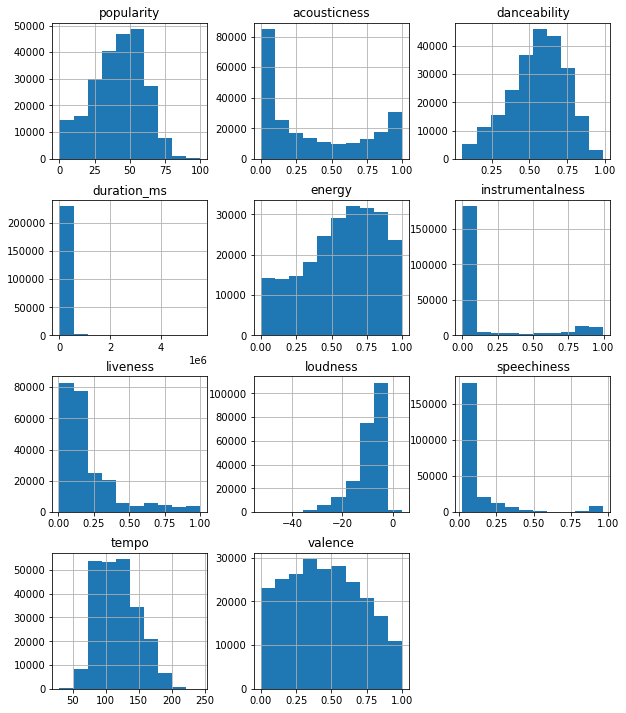

In [88]:
df_audio_feats.hist(figsize=(10,35),layout=(11,3));


In [90]:
import numpy as np

C:\Users\Taylo\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

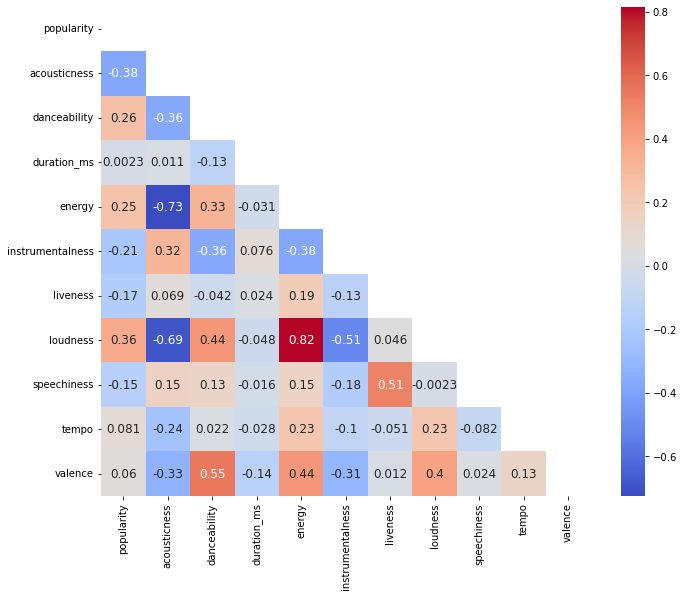

In [101]:
audio_feat_corr = df_audio_feats.corr()  # grabs correlation variables of features
mask = np.zeros_like(audio_feat_corr, dtype=np.bool)  # returns array of zeros w/ same shape and type of given array
mask[np.triu_indices_from(mask)]= True  # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(11, 9))  # Matplotlib figure setup / formats nicely

sns.heatmap(audio_feat_corr,
            mask = mask,
            square = True,
            cmap = 'coolwarm', # Easier visualization of correlated variables
            annot = True,
            annot_kws = {'size': 12})

In our correlation map, we have very little corerelation, however, we see several variables that are correlated with one
another:
* loudness to energy with a value of .82
* loudness and acousticness with a value of -0.69
* energy and acousticness with a value of -0.73

Due to this overlap, we will need to drop one or some of these during our feature to improve our classification and
regression model's performance.

### Final Datasets
Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created).

## Modeling and Evaluation

### Task 1: Classifying Genre -- Multiclass

#### Evaluation Metrics
Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s)
appropriate for analyzing the results of your modeling? Give a detailed explanation
backing up any assertions.

We are using Accuracy and AUC to evaluate between our three classification models. For popularity classification we have
no preference for sensitivity vs. specificity but are evaluating based on overall model accuracy. Neither false
positives, nor false negatives, have an impact other than false classification, so overall accuracy is our best benchmark
measure. We are using AUC as a measure to distinguish between classes and summarize the results of each model's ROC
curve. The higher the AUC score, the better the model performance, in terms of its ability to distinguish between
popular and non-popular songs.

#### Methods
Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate.

We'll use sklearn's train_test_split method to perform cross-validation to help evaluate our estimator performance. The
advantage of using cross-validation is to avoid overfitting our model. We can take all of our data and essentially
"reshuffle" each of our training, and test sets, while holding a final validation set to cover the full spectrum of
 our dataset.

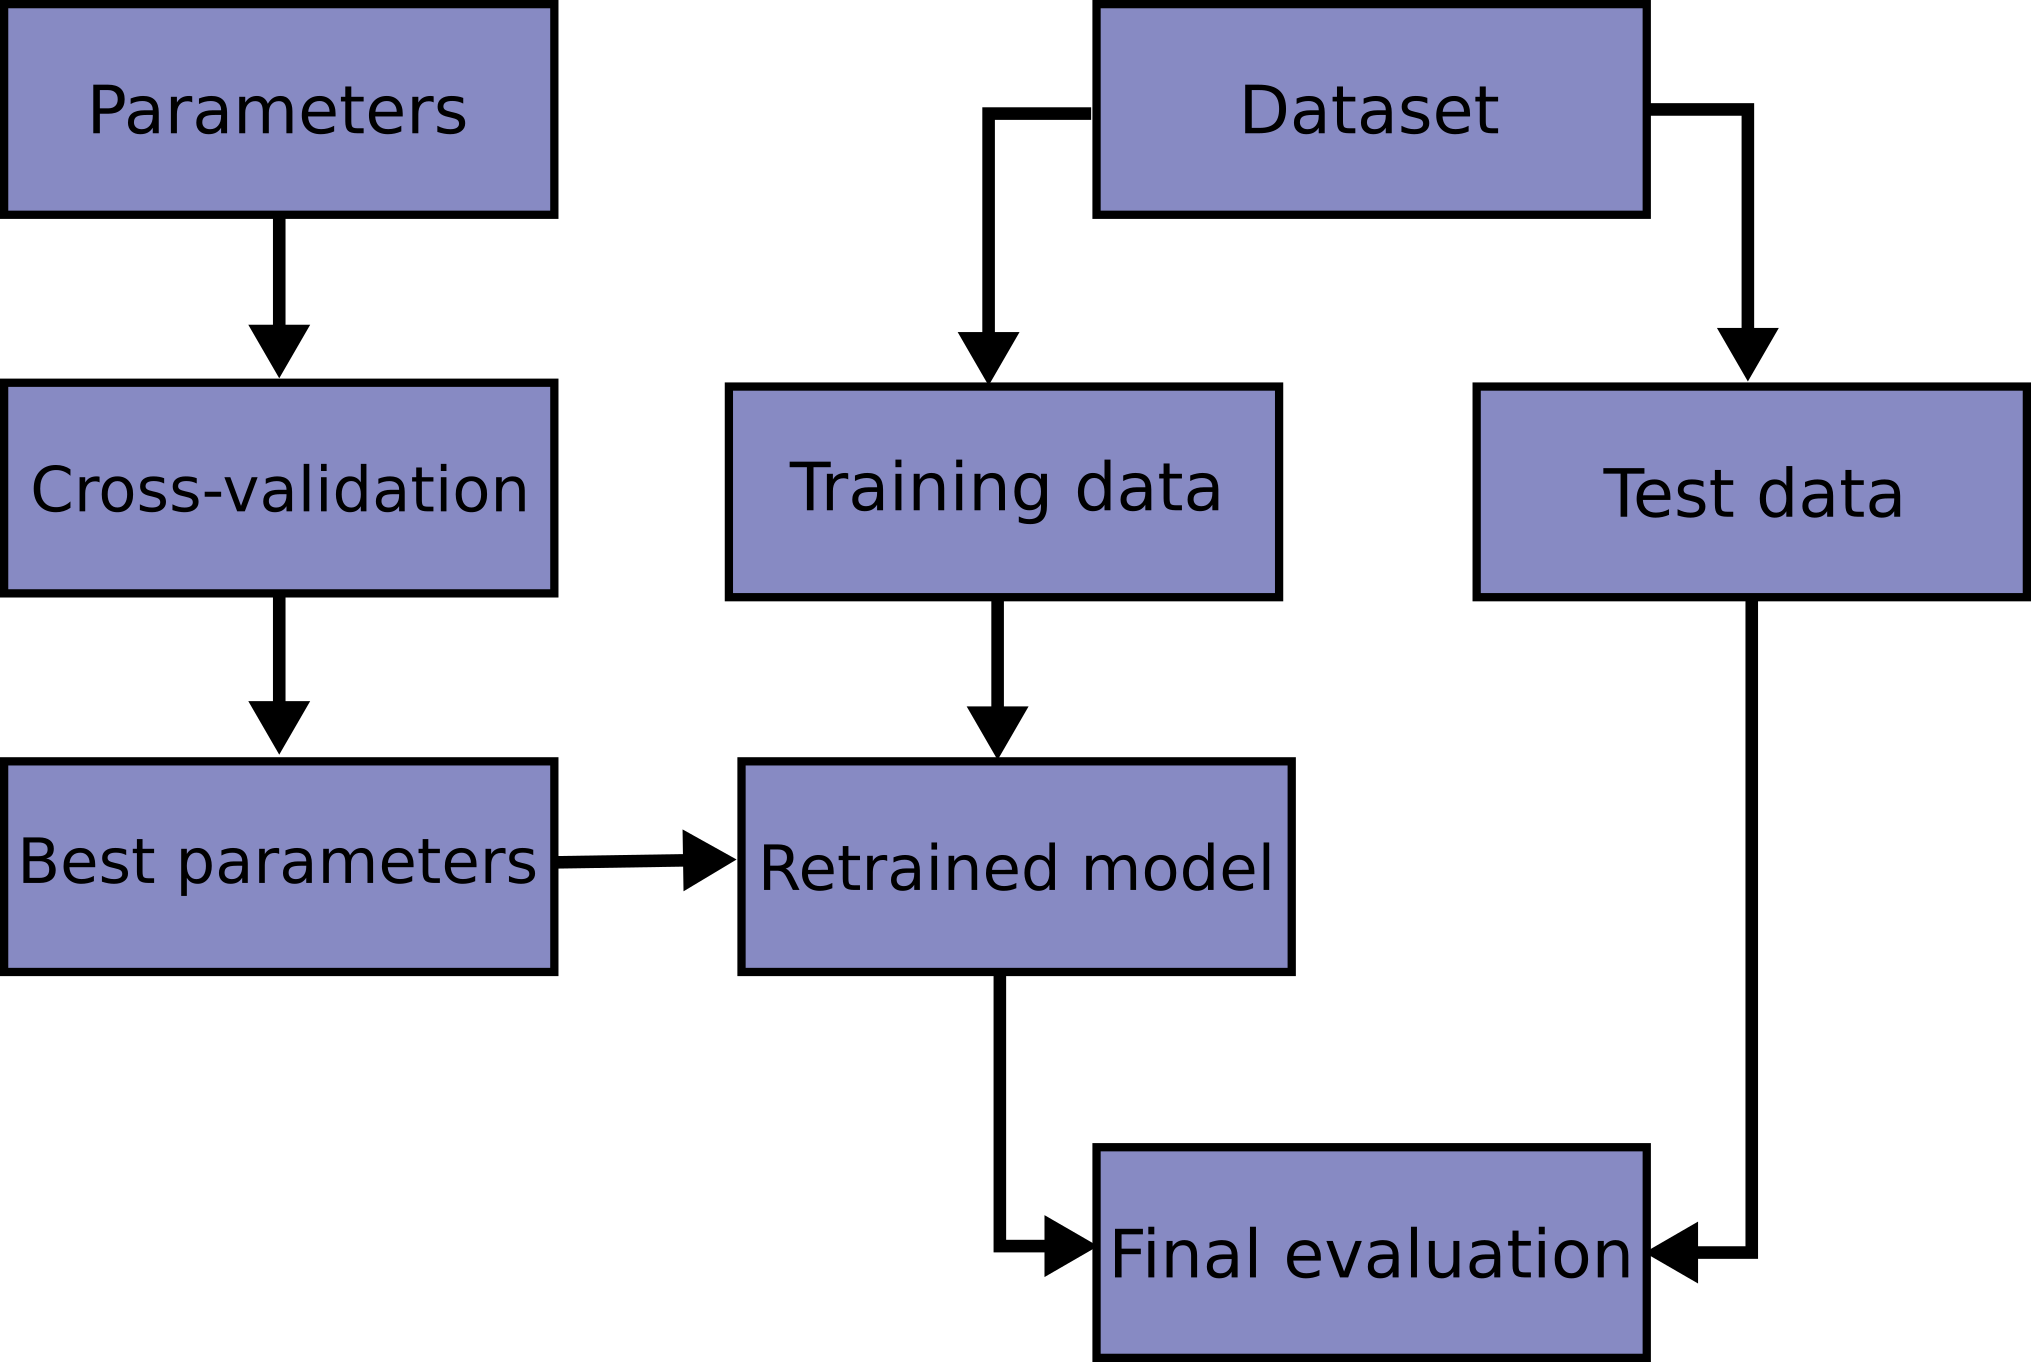

In [182]:
from IPython.display import Image
Image(filename="references/cross-validation-process.png")

This reshuffling, will also allow us to retrain our dataset while evaluating different settings for our hyperparameters/estimators
to avoid risk of overfitting on our test set as we will have a validation set we can use for our final model.

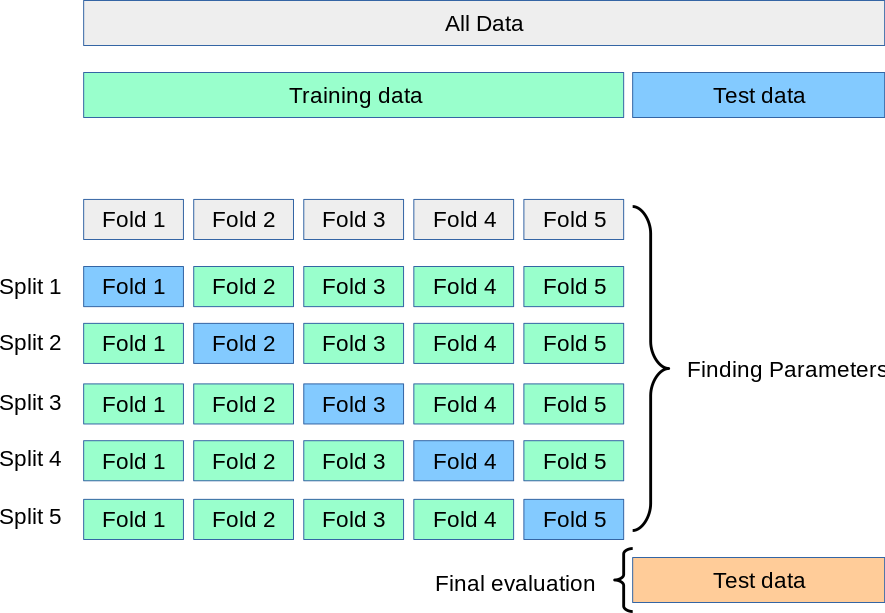

In [184]:
from IPython.display import Image
Image(filename="references/cross-validation-data-sets.png")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

#### Models
1. Create three different classification/regression models (e.g., random forest,
KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric.
* Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.
* Discuss the advantages of each model for each classification task, if any. If
there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.

##### Model 1: KNN Classifier

##### Model 2: Decision Tree Classifier

##### Model 3: Linear Support Vector Classifier

#### Important Dataset Features for Analysis
Which attributes from your analysis are most important? Use proper
methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.

### Task 2: Regression -- Predicting Popularity
#### Evaluation Metrics
Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s)
appropriate for analyzing the results of your modeling? Give a detailed explanation
backing up any assertions.

#### Methods
Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate.

**For feature selection, we will select the following features which are only based on music theory and not artist/song
information:**
* acousticness
* danceability
* duration_ms
* energy
* instrumentalness
* key
* liveliness
* loudness
* mode
* speeciness
* tempo
* time_signature
* valence

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [ ]:
training = df.sample(frac=0.8, random_state=420)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=420)

#### Models
1. Create three different classification/regression models (e.g., random forest,
KNN, and SVM). Two modeling techniques must be new (but the third could be SVM or
logistic regression). Adjust parameters as appropriate to increase generalization
performance using your chosen metric.
* Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis. Explain any visuals and analyze why
they are interesting to someone that might use this model.
* Discuss the advantages of each model for each classification task, if any. If
there are not advantages, explain why. Is any model better than another? Is the
difference significant with 95% confidence? Use proper statistical comparison methods.

##### Model 1: Logistic Regression

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict)
print("AUC: " + str(LR_AUC))

##### Model 2: Random Forest

In [ ]:
# Random Forest Classifier
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))

In [ ]:
# random forest for feature importance on a regression problem

# Trying to show the feature name instead of feature 1 , feature 2.
# TODO: Try if you can show the feature name in the plot

from matplotlib import pyplot

# define dataset
# get importance
importance = RFC_Model.feature_importances_
importance
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Model 3: XGBoost

#### Important Dataset Features for Analysis
Which attributes from your analysis are most important? Use proper
methods discussed in class to evaluate the importance of different attributes. Discuss
the results and hypothesize about why certain attributes are more important than others
for a given classification task.

## Deployment
How useful is your model for interested parties (i.e., the companies or
organizations that might want to use it for prediction)? How would you measure the
model's value if it was used by these parties? How would your deploy your model for
interested parties? What other data should be collected? How often would the model
need to be updated, etc.?

## Exceptional Work!
You have free reign to provide additional modeling.

**One idea:** grid search parameters in a parallelized fashion and visualize the
performances across attributes. Which parameters are most significant for making a
good model for each classification algorithm?